In [18]:
pip install tensorflow

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [20]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
#normalize value
X_train=X_train/255.0
X_test=X_test/255.0

In [21]:
#flattern data
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

In [22]:
#convert label into one-hot encoder
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [23]:

#build model
model=models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
   ])

In [24]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=10,batch_size=22,validation_split=0.2)

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7807 - loss: 4.7136 - val_accuracy: 0.8878 - val_loss: 0.4843
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9008 - loss: 0.3832 - val_accuracy: 0.9329 - val_loss: 0.2652
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9322 - loss: 0.2531 - val_accuracy: 0.9360 - val_loss: 0.2470
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9458 - loss: 0.2091 - val_accuracy: 0.9522 - val_loss: 0.1810
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9554 - loss: 0.1670 - val_accuracy: 0.9531 - val_loss: 0.2102
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9602 - loss: 0.1476 - val_accuracy: 0.9515 - val_loss: 0.1783
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9650 - loss: 0.1279 - val_accuracy: 0.9568 - val_loss: 0.1724
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9686 - loss: 0.

In [26]:
#evaluate model
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("test accuracy",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9472 - loss: 0.2487
test accuracy 0.957099974155426


In [30]:
prediction=model.predict(X_test)
predicted_labels=tf.argmax(prediction,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
prediction
print("predicted labels:",predicted_labels[0])

predicted labels: tf.Tensor(7, shape=(), dtype=int64)


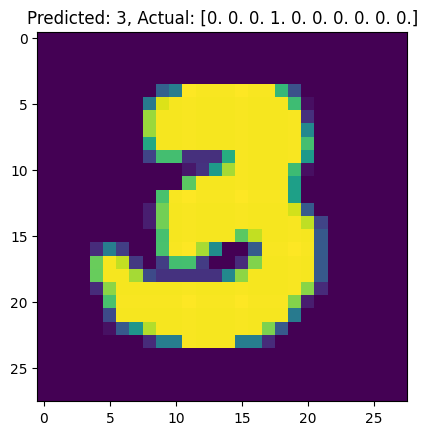

In [53]:
plt.imshow(X_test[200].reshape(28, 28))
plt.title(f'Predicted: {np.argmax(prediction[200])}, Actual: {y_test[200]}')
plt.show()
